# Import Libraries

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd


# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

# Helper functions

# Import Data

In [4]:
data = pd.read_csv("input/train.csv")
del data['Unnamed: 0']

In [5]:
rows,cols=data.shape
print("Number of rows = {}".format(rows))
print("Number of cols = {}".format(cols))

Number of rows = 150000
Number of cols = 11


In [6]:
#description of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [7]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000



### Age bins of 10 years


In [8]:
print(data[data['age']<20].shape)
print(data[(data['age']<20)&(data['SeriousDlqin2yrs']==1)].shape)

(1, 11)
(0, 11)


In [10]:
data[data['age']==0].shape

(1, 11)

In [11]:
print(data[(data['age']>20)&(data['age']<30)].shape)
print(data[(data['age']>20)&(data['age']<30)&(data['SeriousDlqin2yrs']==1)].shape)

(8820, 11)
(1035, 11)


In [12]:
print(data[(data['age']>30)&(data['age']<40)].shape)
print(data[(data['age']>30)&(data['age']<40)&(data['SeriousDlqin2yrs']==1)].shape)

(21246, 11)
(2126, 11)


In [13]:
print(data[(data['age']>40)&(data['age']<50)].shape)
print(data[(data['age']>40)&(data['age']<50)&(data['SeriousDlqin2yrs']==1)].shape)

(31284, 11)
(2614, 11)


In [14]:
print(data[(data['age']>50)&(data['age']<60)].shape)
print(data[(data['age']>50)&(data['age']<60)&(data['SeriousDlqin2yrs']==1)].shape)

(31548, 11)
(1999, 11)


In [15]:
print(data[(data['age']>60)&(data['age']<70)].shape)
print(data[(data['age']>60)&(data['age']<70)&(data['SeriousDlqin2yrs']==1)].shape)

(25647, 11)
(900, 11)


In [16]:
print(data[(data['age']>70)&(data['age']<80)].shape)
print(data[(data['age']>70)&(data['age']<80)&(data['SeriousDlqin2yrs']==1)].shape)

(11824, 11)
(279, 11)


In [17]:
print(data[(data['age']>80)&(data['age']<90)].shape)
print(data[(data['age']>80)&(data['age']<90)&(data['SeriousDlqin2yrs']==1)].shape)

(4249, 11)
(86, 11)


In [18]:
print(data[(data['age']>90)&(data['age']<100)].shape)
print(data[(data['age']>90)&(data['age']<100)&(data['SeriousDlqin2yrs']==1)].shape)

(476, 11)
(10, 11)


In [19]:
print(data[(data['age']>100)&(data['age']<110)].shape)
print(data[(data['age']>100)&(data['age']<110)&(data['SeriousDlqin2yrs']==1)].shape)

(13, 11)
(1, 11)


<function matplotlib.pyplot.show>

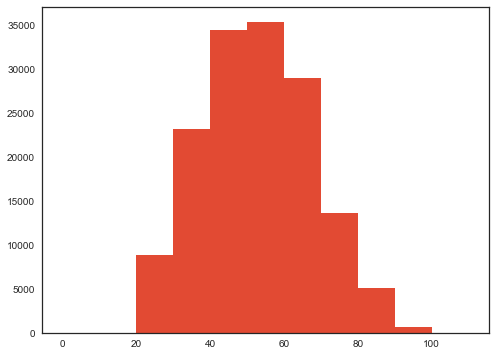

In [20]:
plt.hist(data['age'],bins=[0,10,20,30,40,50,60,70,80,90,100,110])
plt.show

<function matplotlib.pyplot.show>

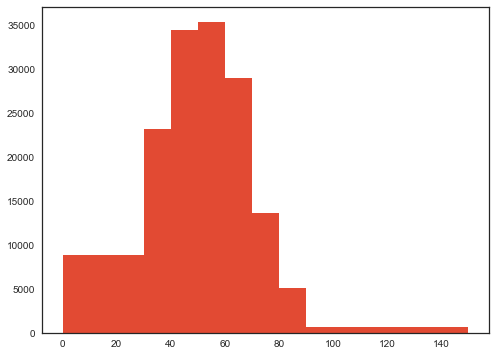

In [21]:
plt.hist(data['age'],bins=[0,30,40,50,60,70,80,90,150])
plt.show

In [22]:
bins = np.array([-1,30,40,50,60,70,80,90,150])

In [23]:
inds = np.digitize(data['age'], bins, right=True)
inds.shape

(150000,)

In [24]:
data['age_bins']=inds

In [23]:
#x=data['age']
#for n in range(x.size):
  # print(bins[inds[n]-1], "<=", x[n], "<", bins[inds[n]])

In [24]:
#data.info()

In [25]:
data_with_dummies = pd.get_dummies(data['age_bins'], prefix= 'age')

In [26]:
data_with_dummies.info()
data_with_dummies.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
age_1    150000 non-null uint8
age_2    150000 non-null uint8
age_3    150000 non-null uint8
age_4    150000 non-null uint8
age_5    150000 non-null uint8
age_6    150000 non-null uint8
age_7    150000 non-null uint8
age_8    150000 non-null uint8
dtypes: uint8(8)
memory usage: 1.1 MB


(150000, 8)

In [27]:
del data_with_dummies['age_8']

In [28]:
data_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 7 columns):
age_1    150000 non-null uint8
age_2    150000 non-null uint8
age_3    150000 non-null uint8
age_4    150000 non-null uint8
age_5    150000 non-null uint8
age_6    150000 non-null uint8
age_7    150000 non-null uint8
dtypes: uint8(7)
memory usage: 1.0 MB


In [27]:
#data['age_0']=data_with_dummies['age_0']

In [29]:
data['age_1']=data_with_dummies['age_1']

In [30]:
data['age_2']=data_with_dummies['age_2']

In [31]:
data['age_3']=data_with_dummies['age_3']

In [32]:
data['age_4']=data_with_dummies['age_4']

In [33]:
data['age_5']=data_with_dummies['age_5']

In [34]:
data['age_6']=data_with_dummies['age_6']

In [35]:
data['age_7']=data_with_dummies['age_7']

In [36]:
#data['age_8']=data_with_dummies['age_8']

In [36]:
#data['age_9']=data_with_dummies['age_9']

In [37]:
#data['age_10']=data_with_dummies['age_10']

In [36]:
del data['age']

In [37]:
del data['age_bins']

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 17 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
age_1                                   150000 non-null uint8
age_2                                   150000 non-null uint8
age_3                                   150000 non-null uint8
age_4                                   150000 non-null uint8
age_5        

# Impute missing values with -1

In [39]:
data = data.fillna(-1)

In [40]:
#data.info()

In [41]:
#data.describe()

# Number of Dependents

In [42]:
print(data[data['NumberOfDependents']==-1].shape)
print(data[(data['NumberOfDependents']==-1)&(data['SeriousDlqin2yrs']==1)].shape)

(3924, 17)
(179, 17)


In [43]:
print(data[data['NumberOfDependents']==0].shape)
print(data[(data['NumberOfDependents']==0)&(data['SeriousDlqin2yrs']==1)].shape)

(86902, 17)
(5095, 17)


In [44]:
print(data[data['NumberOfDependents']==1].shape)
print(data[(data['NumberOfDependents']==1)&(data['SeriousDlqin2yrs']==1)].shape)

(26316, 17)
(1935, 17)


In [45]:
print(data[data['NumberOfDependents']==2].shape)
print(data[(data['NumberOfDependents']==2)&(data['SeriousDlqin2yrs']==1)].shape)

(19522, 17)
(1584, 17)


In [46]:
print(data[data['NumberOfDependents']==3].shape)
print(data[(data['NumberOfDependents']==3)&(data['SeriousDlqin2yrs']==1)].shape)

(9483, 17)
(837, 17)


In [47]:
print(data[data['NumberOfDependents']==4].shape)
print(data[(data['NumberOfDependents']==4)&(data['SeriousDlqin2yrs']==1)].shape)

(2862, 17)
(297, 17)


In [48]:
print(data[data['NumberOfDependents']==5].shape)
print(data[(data['NumberOfDependents']==5)&(data['SeriousDlqin2yrs']==1)].shape)

(746, 17)
(68, 17)


In [49]:
print(data[data['NumberOfDependents']>5].shape)
print(data[(data['NumberOfDependents']>5)&(data['SeriousDlqin2yrs']==1)].shape)

(245, 17)
(31, 17)


###### Imputing missing values in Number of dependents with 0

In [50]:
# 0 is the mode of NumberOfDependents
data.loc[(data['NumberOfDependents']==-1),'NumberOfDependents']=0

In [51]:
bins = np.array([-1,0,1,2,3,4,50])

In [52]:
inds = np.digitize(data['NumberOfDependents'],bins,right=True)

In [53]:
x=data['NumberOfDependents']

In [54]:
#for n in range(x.size):
 #   print(bins[inds[n]-1], "<=", x[n], "<", bins[inds[n]])

In [55]:
data['dependents_bins']=inds

In [56]:
data_with_dummies_dep = pd.get_dummies(data['dependents_bins'], prefix= 'dep')

In [57]:
data_with_dummies_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
dep_1    150000 non-null uint8
dep_2    150000 non-null uint8
dep_3    150000 non-null uint8
dep_4    150000 non-null uint8
dep_5    150000 non-null uint8
dep_6    150000 non-null uint8
dtypes: uint8(6)
memory usage: 879.0 KB


In [58]:
del data_with_dummies_dep['dep_6']

In [59]:
data_with_dummies_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 5 columns):
dep_1    150000 non-null uint8
dep_2    150000 non-null uint8
dep_3    150000 non-null uint8
dep_4    150000 non-null uint8
dep_5    150000 non-null uint8
dtypes: uint8(5)
memory usage: 732.5 KB


In [60]:
data['dep_1']=data_with_dummies_dep['dep_1']

In [61]:
data['dep_2']=data_with_dummies_dep['dep_2']

In [62]:
data['dep_3']=data_with_dummies_dep['dep_3']

In [63]:
data['dep_4']=data_with_dummies_dep['dep_4']

In [64]:
data['dep_5']=data_with_dummies_dep['dep_5']

In [65]:
del data['NumberOfDependents']

In [66]:
del data['dependents_bins']

In [67]:
#data.info()

# 30-59 days past due

<function matplotlib.pyplot.show>

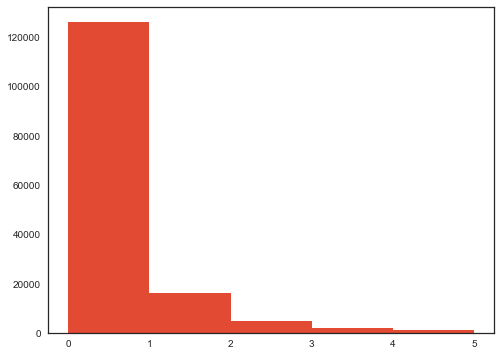

In [68]:
plt.hist(data['NumberOfTime30-59DaysPastDueNotWorse'],bins=[0,1,2,3,4,5])
plt.show

In [69]:
print(data[data['NumberOfTime30-59DaysPastDueNotWorse']==0].shape)
print(data[(data['NumberOfTime30-59DaysPastDueNotWorse']==0)&(data['SeriousDlqin2yrs']==1)].shape)

(126018, 21)
(5041, 21)


In [70]:
print(data[data['NumberOfTime30-59DaysPastDueNotWorse']==1].shape)
print(data[(data['NumberOfTime30-59DaysPastDueNotWorse']==1)&(data['SeriousDlqin2yrs']==1)].shape)

(16033, 21)
(2409, 21)


In [71]:
print(data[data['NumberOfTime30-59DaysPastDueNotWorse']==2].shape)
print(data[(data['NumberOfTime30-59DaysPastDueNotWorse']==2)&(data['SeriousDlqin2yrs']==1)].shape)

(4598, 21)
(1219, 21)


In [72]:
print(data[data['NumberOfTime30-59DaysPastDueNotWorse']==3].shape)
print(data[(data['NumberOfTime30-59DaysPastDueNotWorse']==3)&(data['SeriousDlqin2yrs']==1)].shape)

(1754, 21)
(618, 21)


In [73]:
print(data[data['NumberOfTime30-59DaysPastDueNotWorse']==4].shape)
print(data[(data['NumberOfTime30-59DaysPastDueNotWorse']==4)&(data['SeriousDlqin2yrs']==1)].shape)

(747, 21)
(318, 21)


In [74]:
print(data[data['NumberOfTime30-59DaysPastDueNotWorse']==5].shape)
print(data[(data['NumberOfTime30-59DaysPastDueNotWorse']==5)&(data['SeriousDlqin2yrs']==1)].shape)

(342, 21)
(154, 21)


In [75]:
print(data[data['NumberOfTime30-59DaysPastDueNotWorse']==6].shape)
print(data[(data['NumberOfTime30-59DaysPastDueNotWorse']==6)&(data['SeriousDlqin2yrs']==1)].shape)

(140, 21)
(74, 21)


In [76]:
print(data[data['NumberOfTime30-59DaysPastDueNotWorse']==7].shape)
print(data[(data['NumberOfTime30-59DaysPastDueNotWorse']==7)&(data['SeriousDlqin2yrs']==1)].shape)

(54, 21)
(28, 21)


In [77]:
print(data[data['NumberOfTime30-59DaysPastDueNotWorse']==8].shape)
print(data[(data['NumberOfTime30-59DaysPastDueNotWorse']==8)&(data['SeriousDlqin2yrs']==1)].shape)

(25, 21)
(8, 21)


In [78]:
print(data[data['NumberOfTime30-59DaysPastDueNotWorse']>=3].shape)
print(data[(data['NumberOfTime30-59DaysPastDueNotWorse']>=3)&(data['SeriousDlqin2yrs']==1)].shape)

(3351, 21)
(1357, 21)


In [79]:
bins = np.array([-1,0,1,2,3,100])

In [80]:
inds = np.digitize(data['NumberOfTime30-59DaysPastDueNotWorse'],bins,right=True)

In [81]:
data['30_59_bins']=inds

In [82]:
data_with_dummies_30_59 = pd.get_dummies(data['30_59_bins'], prefix= '30_59')

In [83]:
data_with_dummies_30_59.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 5 columns):
30_59_1    150000 non-null uint8
30_59_2    150000 non-null uint8
30_59_3    150000 non-null uint8
30_59_4    150000 non-null uint8
30_59_5    150000 non-null uint8
dtypes: uint8(5)
memory usage: 732.5 KB


In [84]:
del data_with_dummies_30_59['30_59_5']

In [85]:
data_with_dummies_30_59.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
30_59_1    150000 non-null uint8
30_59_2    150000 non-null uint8
30_59_3    150000 non-null uint8
30_59_4    150000 non-null uint8
dtypes: uint8(4)
memory usage: 586.0 KB


In [86]:
#x=data['NumberOfTime30-59DaysPastDueNotWorse']

In [87]:
#for n in range(x.size):
   # print(bins[inds[n]-1], "<=", x[n], "<", bins[inds[n]])

In [88]:
data['30_59_1']=data_with_dummies_30_59['30_59_1']

In [89]:
data['30_59_2']=data_with_dummies_30_59['30_59_2']

In [90]:
data['30_59_3']=data_with_dummies_30_59['30_59_3']

In [91]:
data['30_59_4']=data_with_dummies_30_59['30_59_4']

In [92]:
#data['30_59_5']=data_with_dummies_30_59['30_59_5']

In [93]:
#data['30_59_6']=data_with_dummies_30_59['30_59_6']

In [94]:
#data.info()

In [95]:
del data['30_59_bins']

In [96]:
del data['NumberOfTime30-59DaysPastDueNotWorse']

In [97]:
#data.info()

# 60-89 days past due

<function matplotlib.pyplot.show>

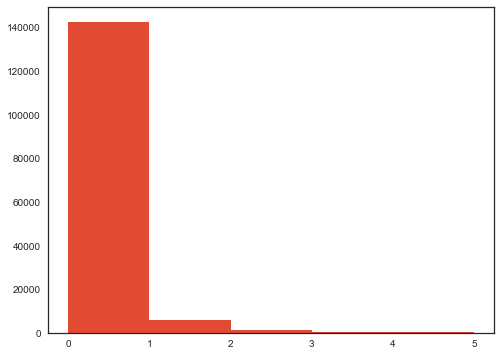

In [98]:
plt.hist(data['NumberOfTime60-89DaysPastDueNotWorse'],bins=[0,1,2,3,4,5])
plt.show

In [99]:
print(data[data['NumberOfTime60-89DaysPastDueNotWorse']==0].shape)
print(data[(data['NumberOfTime60-89DaysPastDueNotWorse']==0)&(data['SeriousDlqin2yrs']==1)].shape)

(142396, 24)
(7256, 24)


In [100]:
print(data[data['NumberOfTime60-89DaysPastDueNotWorse']==1].shape)
print(data[(data['NumberOfTime60-89DaysPastDueNotWorse']==1)&(data['SeriousDlqin2yrs']==1)].shape)

(5731, 24)
(1777, 24)


In [101]:
print(data[data['NumberOfTime60-89DaysPastDueNotWorse']==2].shape)
print(data[(data['NumberOfTime60-89DaysPastDueNotWorse']==2)&(data['SeriousDlqin2yrs']==1)].shape)

(1118, 24)
(561, 24)


In [102]:
print(data[data['NumberOfTime60-89DaysPastDueNotWorse']==3].shape)
print(data[(data['NumberOfTime60-89DaysPastDueNotWorse']==3)&(data['SeriousDlqin2yrs']==1)].shape)

(318, 24)
(180, 24)


In [103]:
print(data[data['NumberOfTime60-89DaysPastDueNotWorse']==4].shape)
print(data[(data['NumberOfTime60-89DaysPastDueNotWorse']==4)&(data['SeriousDlqin2yrs']==1)].shape)

(105, 24)
(65, 24)


In [104]:
bins = np.array([-1,0,1,2,3,100])

In [105]:
inds = np.digitize(data['NumberOfTime60-89DaysPastDueNotWorse'],bins,right=True)

In [106]:
data['60_bins']=inds

In [107]:
data_with_dummies_60 = pd.get_dummies(data['60_bins'], prefix= '60')

In [108]:
data_with_dummies_60.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 5 columns):
60_1    150000 non-null uint8
60_2    150000 non-null uint8
60_3    150000 non-null uint8
60_4    150000 non-null uint8
60_5    150000 non-null uint8
dtypes: uint8(5)
memory usage: 732.5 KB


In [109]:
del data_with_dummies_60['60_5']

In [110]:
data_with_dummies_60.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
60_1    150000 non-null uint8
60_2    150000 non-null uint8
60_3    150000 non-null uint8
60_4    150000 non-null uint8
dtypes: uint8(4)
memory usage: 586.0 KB


In [111]:
#x=data['NumberOfTime60-89DaysPastDueNotWorse']

In [112]:
#for n in range(x.size):
   # print(bins[inds[n]-1], "<=", x[n], "<", bins[inds[n]])

In [113]:
data['60_1']=data_with_dummies_60['60_1']

In [114]:
data['60_2']=data_with_dummies_60['60_2']

In [115]:
data['60_3']=data_with_dummies_60['60_3']

In [116]:
data['60_4']=data_with_dummies_60['60_4']

In [117]:
#data['60_5']=data_with_dummies_60['60_5']

In [118]:
#data['60_6']=data_with_dummies_60['60_6']

In [119]:
del data['60_bins']

In [120]:
del data['NumberOfTime60-89DaysPastDueNotWorse']

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 27 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
age_1                                   150000 non-null uint8
age_2                                   150000 non-null uint8
age_3                                   150000 non-null uint8
age_4                                   150000 non-null uint8
age_5                                   150000 non-null uint8
age_6                                   150000 non-null uint8
age_7                                   150000 non-null uint8
dep_1          

# 90 days or late

<function matplotlib.pyplot.show>

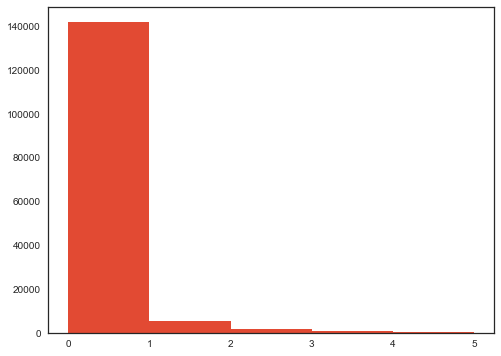

In [122]:
plt.hist(data['NumberOfTimes90DaysLate'],bins=[0,1,2,3,4,5])
plt.show

In [123]:
print(data[data['NumberOfTimes90DaysLate']==0].shape)
print(data[(data['NumberOfTimes90DaysLate']==0)&(data['SeriousDlqin2yrs']==1)].shape)

(141662, 27)
(6554, 27)


In [124]:
print(data[data['NumberOfTimes90DaysLate']==1].shape)
print(data[(data['NumberOfTimes90DaysLate']==1)&(data['SeriousDlqin2yrs']==1)].shape)

(5243, 27)
(1765, 27)


In [125]:
print(data[data['NumberOfTimes90DaysLate']==2].shape)
print(data[(data['NumberOfTimes90DaysLate']==2)&(data['SeriousDlqin2yrs']==1)].shape)

(1555, 27)
(776, 27)


In [126]:
print(data[data['NumberOfTimes90DaysLate']==3].shape)
print(data[(data['NumberOfTimes90DaysLate']==3)&(data['SeriousDlqin2yrs']==1)].shape)

(667, 27)
(385, 27)


In [127]:
print(data[data['NumberOfTimes90DaysLate']==4].shape)
print(data[(data['NumberOfTimes90DaysLate']==4)&(data['SeriousDlqin2yrs']==1)].shape)

(291, 27)
(195, 27)


In [128]:
print(data[data['NumberOfTimes90DaysLate']==5].shape)
print(data[(data['NumberOfTimes90DaysLate']==5)&(data['SeriousDlqin2yrs']==1)].shape)

(131, 27)
(83, 27)


In [129]:
print(data[data['NumberOfTimes90DaysLate']>=4].shape)
print(data[(data['NumberOfTimes90DaysLate']>=4)&(data['SeriousDlqin2yrs']==1)].shape)

(873, 27)
(546, 27)


In [130]:
bins = np.array([-1,0,1,2,3,4,1000])

In [131]:
inds = np.digitize(data['NumberOfTimes90DaysLate'],bins,right=True)

In [132]:
data['90_bins']=inds

In [133]:
data_with_dummies_90 = pd.get_dummies(data['90_bins'], prefix= '90')

In [134]:
data_with_dummies_90.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
90_1    150000 non-null uint8
90_2    150000 non-null uint8
90_3    150000 non-null uint8
90_4    150000 non-null uint8
90_5    150000 non-null uint8
90_6    150000 non-null uint8
dtypes: uint8(6)
memory usage: 879.0 KB


In [135]:
del data_with_dummies_90['90_6']

In [136]:
#x=data['NumberOfTimes90DaysLate']

In [137]:
#for n in range(x.size):
    #print(bins[inds[n]-1], "<=", x[n], "<", bins[inds[n]])

In [138]:
data['90_1']=data_with_dummies_90['90_1']

In [139]:
data['90_2']=data_with_dummies_90['90_2']

In [140]:
data['90_3']=data_with_dummies_90['90_3']

In [141]:
data['90_4']=data_with_dummies_90['90_4']

In [142]:
data['90_5']=data_with_dummies_90['90_5']

In [143]:
#data['90_6']=data_with_dummies_90['90_6']

In [144]:
#data['90_7']=data_with_dummies_90['90_7']

In [145]:
del data['90_bins']

In [146]:
del data['NumberOfTimes90DaysLate']

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
age_1                                   150000 non-null uint8
age_2                                   150000 non-null uint8
age_3                                   150000 non-null uint8
age_4                                   150000 non-null uint8
age_5                                   150000 non-null uint8
age_6                                   150000 non-null uint8
age_7                                   150000 non-null uint8
dep_1                                   150000 non-null uint8
dep_2          

# Number of credit lines

<function matplotlib.pyplot.show>

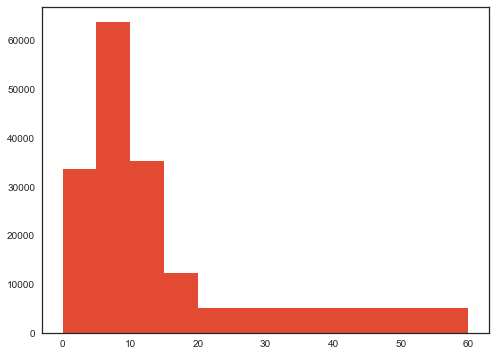

In [148]:
plt.hist(data['NumberOfOpenCreditLinesAndLoans'],bins=[0,5,10,15,20,60])
plt.show

In [149]:
print(data[data['NumberOfOpenCreditLinesAndLoans']<=5].shape)
print(data[(data['NumberOfOpenCreditLinesAndLoans']<=5)&(data['SeriousDlqin2yrs']==1)].shape)

(46590, 31)
(3922, 31)


In [150]:
print(data[(data['NumberOfOpenCreditLinesAndLoans']>5)&(data['NumberOfOpenCreditLinesAndLoans']<=10)].shape)
print(data[(data['NumberOfOpenCreditLinesAndLoans']>5)&(data['NumberOfOpenCreditLinesAndLoans']<=10)&(data['SeriousDlqin2yrs']==1)].shape)

(60400, 31)
(3345, 31)


In [151]:
print(data[(data['NumberOfOpenCreditLinesAndLoans']>10)&(data['NumberOfOpenCreditLinesAndLoans']<=15)].shape)
print(data[(data['NumberOfOpenCreditLinesAndLoans']>10)&(data['NumberOfOpenCreditLinesAndLoans']<=15)&(data['SeriousDlqin2yrs']==1)].shape)

(29184, 31)
(1804, 31)


In [152]:
print(data[(data['NumberOfOpenCreditLinesAndLoans']>15)&(data['NumberOfOpenCreditLinesAndLoans']<=20)].shape)
print(data[(data['NumberOfOpenCreditLinesAndLoans']>15)&(data['NumberOfOpenCreditLinesAndLoans']<=20)&(data['SeriousDlqin2yrs']==1)].shape)

(9846, 31)
(676, 31)


In [153]:
print(data[data['NumberOfOpenCreditLinesAndLoans']>20].shape)
print(data[(data['NumberOfOpenCreditLinesAndLoans']>20)&(data['SeriousDlqin2yrs']==1)].shape)

(3980, 31)
(279, 31)


In [154]:
bins = np.array([-1,5,10,15,20,100])

In [155]:
inds = np.digitize(data['NumberOfOpenCreditLinesAndLoans'],bins,right=True)

In [156]:
data['cl_bins']=inds

In [157]:
data_with_dummies_cl = pd.get_dummies(data['cl_bins'], prefix= 'cl')

In [158]:
data_with_dummies_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 5 columns):
cl_1    150000 non-null uint8
cl_2    150000 non-null uint8
cl_3    150000 non-null uint8
cl_4    150000 non-null uint8
cl_5    150000 non-null uint8
dtypes: uint8(5)
memory usage: 732.5 KB


In [159]:
del data_with_dummies_cl['cl_5']

In [160]:
#data_with_dummies_cl.info()

In [161]:
#data['cl_0']=data_with_dummies_cl['cl_0']

In [162]:
data['cl_1']=data_with_dummies_cl['cl_1']

In [163]:
data['cl_2']=data_with_dummies_cl['cl_2']

In [164]:
data['cl_3']=data_with_dummies_cl['cl_3']

In [165]:
data['cl_4']=data_with_dummies_cl['cl_4']

In [166]:
#data['cl_5']=data_with_dummies_cl['cl_5']

In [167]:
#data['cl_6']=data_with_dummies_cl['cl_6']

In [168]:
#data.info()

In [169]:
del data['cl_bins']

In [170]:
del data['NumberOfOpenCreditLinesAndLoans']

# Real estate lines

<function matplotlib.pyplot.show>

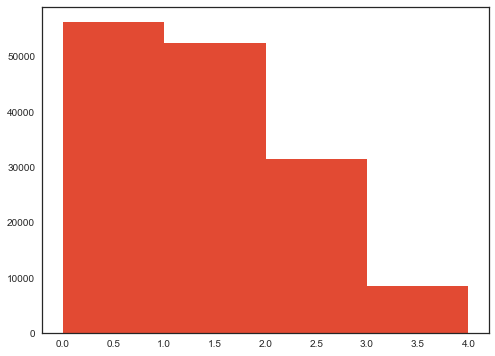

In [171]:
plt.hist(data['NumberRealEstateLoansOrLines'],bins=[0,1,2,3,4])
plt.show

In [172]:
print(data[data['NumberRealEstateLoansOrLines']==0].shape)
print(data[(data['NumberRealEstateLoansOrLines']==0)&(data['SeriousDlqin2yrs']==1)].shape)


(56188, 34)
(4672, 34)


In [173]:
print(data[data['NumberRealEstateLoansOrLines']==1].shape)
print(data[(data['NumberRealEstateLoansOrLines']==1)&(data['SeriousDlqin2yrs']==1)].shape)


(52338, 34)
(2748, 34)


In [174]:
print(data[data['NumberRealEstateLoansOrLines']==2].shape)
print(data[(data['NumberRealEstateLoansOrLines']==2)&(data['SeriousDlqin2yrs']==1)].shape)


(31522, 34)
(1765, 34)


In [175]:
print(data[data['NumberRealEstateLoansOrLines']==3].shape)
print(data[(data['NumberRealEstateLoansOrLines']==3)&(data['SeriousDlqin2yrs']==1)].shape)


(6300, 34)
(422, 34)


In [176]:
print(data[data['NumberRealEstateLoansOrLines']>=4].shape)
print(data[(data['NumberRealEstateLoansOrLines']>=4)&(data['SeriousDlqin2yrs']==1)].shape)

(3652, 34)
(419, 34)


In [177]:
bins = np.array([-1,0,1,2,100])

In [178]:
inds = np.digitize(data['NumberRealEstateLoansOrLines'],bins,right=True)

In [179]:
data['re_bins']=inds

In [180]:
data_with_dummies_re = pd.get_dummies(data['re_bins'], prefix= 're')

In [181]:
data_with_dummies_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
re_1    150000 non-null uint8
re_2    150000 non-null uint8
re_3    150000 non-null uint8
re_4    150000 non-null uint8
dtypes: uint8(4)
memory usage: 586.0 KB


In [182]:
del data_with_dummies_re['re_4']

In [183]:
#data_with_dummies_re.info()

In [184]:
data['re_1']=data_with_dummies_re['re_1']

In [185]:
data['re_2']=data_with_dummies_re['re_2']

In [186]:
data['re_3']=data_with_dummies_re['re_3']

In [187]:
#data['re_4']=data_with_dummies_re['re_4']

In [188]:
#data['re_5']=data_with_dummies_re['re_5']

In [189]:
#data['re_6']=data_with_dummies_re['re_6']

In [190]:
#data.info()

In [191]:
del data['re_bins']

In [192]:
del data['NumberRealEstateLoansOrLines']

In [193]:
#data.info()

### Imputing missing values in Income column with mean of Age Bins 

In [196]:
np.mean(data[data['age_1']==1]['MonthlyIncome'])

2712.8346346904627

In [197]:
data.loc[(data['age_1']==1)&(data['MonthlyIncome']==-1),'MonthlyIncome']=np.mean(data[data['age_1']==1]['MonthlyIncome'])

In [198]:
np.mean(data[data['age_1']==1]['MonthlyIncome'])

3142.9413508224397

In [199]:
np.mean(data[data['age_2']==1]['MonthlyIncome'])

4960.327868852459

In [200]:
data.loc[(data['age_2']==1)&(data['MonthlyIncome']==-1),'MonthlyIncome']=np.mean(data[data['age_2']==1]['MonthlyIncome'])

In [201]:
np.mean(data[data['age_2']==1]['MonthlyIncome'])

5634.639573941235

In [202]:
np.mean(data[data['age_3']==1]['MonthlyIncome'])

6200.028940833976

In [203]:
data.loc[(data['age_3']==1)&(data['MonthlyIncome']==-1),'MonthlyIncome']=np.mean(data[data['age_3']==1]['MonthlyIncome'])

In [204]:
np.mean(data[data['age_3']==1]['MonthlyIncome'])

7167.7837785327365

In [205]:
np.mean(data[data['age_4']==1]['MonthlyIncome'])

6214.922340975694

In [206]:
data.loc[(data['age_4']==1)&(data['MonthlyIncome']==-1),'MonthlyIncome']=np.mean(data[data['age_4']==1]['MonthlyIncome'])

In [207]:
np.mean(data[data['age_4']==1]['MonthlyIncome'])

7447.891594614079

In [208]:
np.mean(data[data['age_5']==1]['MonthlyIncome'])

5491.026254375729

In [209]:
data.loc[(data['age_5']==1)&(data['MonthlyIncome']==-1),'MonthlyIncome']=np.mean(data[data['age_5']==1]['MonthlyIncome'])

In [210]:
np.mean(data[data['age_5']==1]['MonthlyIncome'])

6882.657323573009

In [211]:
np.mean(data[data['age_6']==1]['MonthlyIncome'])

4055.2067716535435

In [212]:
data.loc[(data['age_6']==1)&(data['MonthlyIncome']==-1),'MonthlyIncome']=np.mean(data[data['age_6']==1]['MonthlyIncome'])

In [213]:
np.mean(data[data['age_6']==1]['MonthlyIncome'])

5195.096690396592

In [214]:
np.mean(data[data['age_7']==1]['MonthlyIncome'])

3404.3764335507085

In [215]:
data.loc[(data['age_7']==1)&(data['MonthlyIncome']==-1),'MonthlyIncome']=np.mean(data[data['age_7']==1]['MonthlyIncome'])

In [216]:
np.mean(data[data['age_7']==1]['MonthlyIncome'])

4625.012825518401

In [218]:
data.loc[(data['age_1']==0)&(data['age_2']==0)&(data['age_3']==0)&(data['age_4']==0)&(data['age_5']==0)&(data['age_6']==0)&(data['age_7']==0)&(data['MonthlyIncome']==-1),'MonthlyIncome']=np.mean(data[(data['age_1']==0)&(data['age_2']==0)&(data['age_3']==0)&(data['age_4']==0)&(data['age_5']==0)&(data['age_6']==0)&(data['age_7']==0)]['MonthlyIncome'])

In [219]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,age_1,age_2,age_3,age_4,age_5,age_6,...,90_3,90_4,90_5,cl_1,cl_2,cl_3,cl_4,re_1,re_2,re_3
count,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.00000,150000.000000
mean,0.066840,6.048438,353.005076,6.392273e+03,0.071720,0.16226,0.233580,0.232040,0.182827,0.084667,...,0.010367,0.004447,0.001940,0.310600,0.402667,0.194560,0.065640,0.374587,0.34892,0.210147
std,0.249746,249.755371,2037.818523,1.290153e+04,0.258025,0.36869,0.423109,0.422136,0.386526,0.278386,...,0.101288,0.066535,0.044003,0.462741,0.490436,0.395863,0.247653,0.484018,0.47663,0.407414
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.029867,0.175074,3.635000e+03,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.154181,0.366508,5.491026e+03,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.559046,0.868254,7.400000e+03,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000
max,1.000000,50708.000000,329664.000000,3.008750e+06,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


# Debt Ratio

<function matplotlib.pyplot.show>

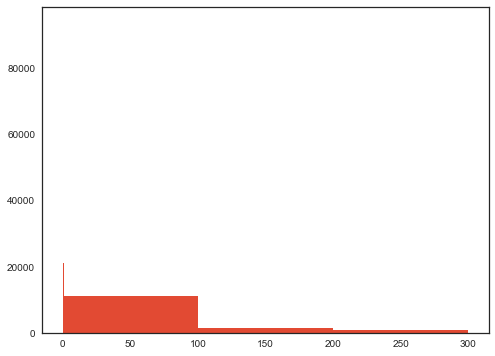

In [220]:
plt.hist(data['DebtRatio'],bins=[-0.1,0,0.5,1,100,200,300])
plt.show

In [221]:
print(data[(data['DebtRatio']>=0)&(data["DebtRatio"]<0.25)].shape)
print(data[(data['DebtRatio']>=0)&(data["DebtRatio"]<0.25)&(data['SeriousDlqin2yrs']==1)].shape)

(52357, 36)
(3125, 36)


In [222]:
print(data[(data['DebtRatio']>=0.25)&(data["DebtRatio"]<0.5)].shape)
print(data[(data['DebtRatio']>=0.25)&(data["DebtRatio"]<0.5)&(data['SeriousDlqin2yrs']==1)].shape)

(41345, 36)
(2530, 36)


In [223]:
print(data[(data['DebtRatio']>=0.5)&(data["DebtRatio"]<0.75)].shape)
print(data[(data['DebtRatio']>=0.5)&(data["DebtRatio"]<0.75)&(data['SeriousDlqin2yrs']==1)].shape)

(15733, 36)
(1484, 36)


In [224]:
print(data[(data['DebtRatio']>=0.75)&(data["DebtRatio"]<1)].shape)
print(data[(data['DebtRatio']>=0.75)&(data["DebtRatio"]<1)&(data['SeriousDlqin2yrs']==1)].shape)


(5199, 36)
(593, 36)


In [225]:
print(data[(data['DebtRatio']>=1)&(data["DebtRatio"]<1500000)].shape)
print(data[(data['DebtRatio']>=1)&(data["DebtRatio"]<1500000)&(data['SeriousDlqin2yrs']==1)].shape)

(35366, 36)
(2294, 36)


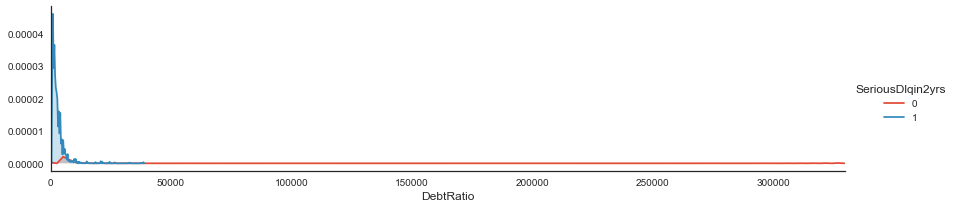

In [226]:
plot_distribution(data,'DebtRatio','SeriousDlqin2yrs')

In [227]:
bins = np.array([-0.1,0,0.25,0.5,0.75,1,10000000])

In [228]:
inds = np.digitize(data['DebtRatio'],bins,right=True)

In [229]:
data['dr_bins']=inds

In [230]:
data_with_dummies_dr = pd.get_dummies(data['dr_bins'], prefix= 'dr')

In [231]:
data_with_dummies_dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
dr_1    150000 non-null uint8
dr_2    150000 non-null uint8
dr_3    150000 non-null uint8
dr_4    150000 non-null uint8
dr_5    150000 non-null uint8
dr_6    150000 non-null uint8
dtypes: uint8(6)
memory usage: 879.0 KB


In [232]:
del data_with_dummies_dr['dr_6']

In [233]:
#x=data['DebtRatio']

In [234]:
#for n in range(x.size):
   # print(bins[inds[n]-1], "<=", x[n], "<", bins[inds[n]])

In [235]:
data['dr_1']=data_with_dummies_dr['dr_1']

In [236]:
data['dr_2']=data_with_dummies_dr['dr_2']

In [237]:
data['dr_3']=data_with_dummies_dr['dr_3']

In [238]:
data['dr_4']=data_with_dummies_dr['dr_4']

In [239]:
data['dr_5']=data_with_dummies_dr['dr_5']

In [240]:
#data['dr_6']=data_with_dummies_dr['dr_6']

In [241]:
#data.info()

In [242]:
del data['dr_bins']

In [243]:
del data['DebtRatio']

# Revolving utilization

<function matplotlib.pyplot.show>

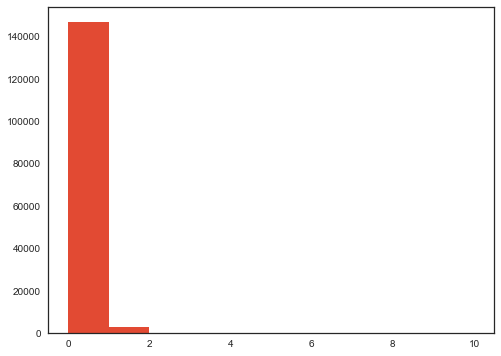

In [244]:
plt.hist(data['RevolvingUtilizationOfUnsecuredLines'],bins=[0,1,2,10])
plt.show

In [245]:
print(data[data['RevolvingUtilizationOfUnsecuredLines']==0].shape)
print(data[(data['RevolvingUtilizationOfUnsecuredLines']==0)&(data['SeriousDlqin2yrs']==1)].shape)

(10878, 40)
(320, 40)


In [246]:
print(data[(data['RevolvingUtilizationOfUnsecuredLines']>0)&(data['RevolvingUtilizationOfUnsecuredLines']<=0.25)].shape)
print(data[(data['RevolvingUtilizationOfUnsecuredLines']>0)&(data['RevolvingUtilizationOfUnsecuredLines']<=0.25)&(data['SeriousDlqin2yrs']==1)].shape)

(76779, 40)
(1553, 40)


In [247]:
print(data[(data['RevolvingUtilizationOfUnsecuredLines']>0.25)&(data['RevolvingUtilizationOfUnsecuredLines']<=0.5)].shape)
print(data[(data['RevolvingUtilizationOfUnsecuredLines']>0.25)&(data['RevolvingUtilizationOfUnsecuredLines']<=0.5)&(data['SeriousDlqin2yrs']==1)].shape)

(21055, 40)
(1114, 40)


In [248]:
print(data[(data['RevolvingUtilizationOfUnsecuredLines']>0.5)&(data['RevolvingUtilizationOfUnsecuredLines']<=0.75)].shape)
print(data[(data['RevolvingUtilizationOfUnsecuredLines']>0.5)&(data['RevolvingUtilizationOfUnsecuredLines']<=0.75)&(data['SeriousDlqin2yrs']==1)].shape)

(13764, 40)
(1394, 40)


In [249]:
print(data[(data['RevolvingUtilizationOfUnsecuredLines']>0.75)&(data['RevolvingUtilizationOfUnsecuredLines']<=1)].shape)
print(data[(data['RevolvingUtilizationOfUnsecuredLines']>0.75)&(data['RevolvingUtilizationOfUnsecuredLines']<=1)&(data['SeriousDlqin2yrs']==1)].shape)

(24203, 40)
(4408, 40)


In [250]:
print(data[(data['RevolvingUtilizationOfUnsecuredLines']>1)&(data['RevolvingUtilizationOfUnsecuredLines']<=2)].shape)
print(data[(data['RevolvingUtilizationOfUnsecuredLines']>1)&(data['RevolvingUtilizationOfUnsecuredLines']<=2)&(data['SeriousDlqin2yrs']==1)].shape)

(2950, 40)
(1183, 40)


In [251]:
data[(data['RevolvingUtilizationOfUnsecuredLines']>2)&(data['RevolvingUtilizationOfUnsecuredLines']<=1000000)].shape

(371, 40)

In [252]:
bins = np.array([-1,0,0.25,0.5,0.75,1,1000000])

In [253]:
inds = np.digitize(data['RevolvingUtilizationOfUnsecuredLines'],bins,right=True)

In [254]:
data['rcu_bins']=inds

In [255]:
data_with_dummies_rcu = pd.get_dummies(data['rcu_bins'], prefix= 'rcu')

In [256]:
data_with_dummies_rcu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
rcu_1    150000 non-null uint8
rcu_2    150000 non-null uint8
rcu_3    150000 non-null uint8
rcu_4    150000 non-null uint8
rcu_5    150000 non-null uint8
rcu_6    150000 non-null uint8
dtypes: uint8(6)
memory usage: 879.0 KB


In [257]:
del data_with_dummies_rcu['rcu_6']

In [258]:
data['rcu_1']=data_with_dummies_rcu['rcu_1']

In [259]:
data['rcu_2']=data_with_dummies_rcu['rcu_2']

In [260]:
data['rcu_3']=data_with_dummies_rcu['rcu_3']

In [261]:
data['rcu_4']=data_with_dummies_rcu['rcu_4']

In [262]:
data['rcu_5']=data_with_dummies_rcu['rcu_5']

In [263]:
#data.info()

In [264]:
del data['RevolvingUtilizationOfUnsecuredLines']

In [265]:
del data['rcu_bins']

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 44 columns):
SeriousDlqin2yrs    150000 non-null int64
MonthlyIncome       150000 non-null float64
age_1               150000 non-null uint8
age_2               150000 non-null uint8
age_3               150000 non-null uint8
age_4               150000 non-null uint8
age_5               150000 non-null uint8
age_6               150000 non-null uint8
age_7               150000 non-null uint8
dep_1               150000 non-null uint8
dep_2               150000 non-null uint8
dep_3               150000 non-null uint8
dep_4               150000 non-null uint8
dep_5               150000 non-null uint8
30_59_1             150000 non-null uint8
30_59_2             150000 non-null uint8
30_59_3             150000 non-null uint8
30_59_4             150000 non-null uint8
60_1                150000 non-null uint8
60_2                150000 non-null uint8
60_3                150000 non-null uint8
60_4 

In [267]:
x=data.sort_values('MonthlyIncome')
inc_sort=x['MonthlyIncome']
inc_cut=pd.qcut(inc_sort,10,labels=['1','2','3','4','5','6','7','8','9','10'])
#inc_cut

In [268]:
data['inc_cut']=inc_cut

In [269]:
del data['MonthlyIncome']
#del data['income_scaled']

In [270]:
data_with_dummies_inc = pd.get_dummies(data['inc_cut'], prefix= 'inc')

In [271]:
data_with_dummies_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
inc_1     150000 non-null uint8
inc_10    150000 non-null uint8
inc_2     150000 non-null uint8
inc_3     150000 non-null uint8
inc_4     150000 non-null uint8
inc_5     150000 non-null uint8
inc_6     150000 non-null uint8
inc_7     150000 non-null uint8
inc_8     150000 non-null uint8
inc_9     150000 non-null uint8
dtypes: uint8(10)
memory usage: 1.4 MB


In [272]:
del data_with_dummies_inc['inc_10']

In [273]:
data['inc_1']=data_with_dummies_inc['inc_1']

In [274]:
data['inc_2']=data_with_dummies_inc['inc_2']

In [275]:
data['inc_3']=data_with_dummies_inc['inc_3']

In [276]:
data['inc_4']=data_with_dummies_inc['inc_4']

In [277]:
data['inc_5']=data_with_dummies_inc['inc_5']

In [278]:
data['inc_6']=data_with_dummies_inc['inc_6']

In [279]:
data['inc_7']=data_with_dummies_inc['inc_7']

In [280]:
data['inc_8']=data_with_dummies_inc['inc_8']

In [281]:
data['inc_9']=data_with_dummies_inc['inc_9']

In [282]:
del data['inc_cut']

In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 52 columns):
SeriousDlqin2yrs    150000 non-null int64
age_1               150000 non-null uint8
age_2               150000 non-null uint8
age_3               150000 non-null uint8
age_4               150000 non-null uint8
age_5               150000 non-null uint8
age_6               150000 non-null uint8
age_7               150000 non-null uint8
dep_1               150000 non-null uint8
dep_2               150000 non-null uint8
dep_3               150000 non-null uint8
dep_4               150000 non-null uint8
dep_5               150000 non-null uint8
30_59_1             150000 non-null uint8
30_59_2             150000 non-null uint8
30_59_3             150000 non-null uint8
30_59_4             150000 non-null uint8
60_1                150000 non-null uint8
60_2                150000 non-null uint8
60_3                150000 non-null uint8
60_4                150000 non-null uint8
90_1   

In [284]:
data.describe()

,SeriousDlqin2yrs,age_1,age_2,age_3,age_4,age_5,age_6,age_7,dep_1,dep_2,...,rcu_5,inc_1,inc_2,inc_3,inc_4,inc_5,inc_6,inc_7,inc_8,inc_9
count,150000.000000,150000.000000,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,0.071720,0.16226,0.233580,0.232040,0.182827,0.084667,0.029647,0.605507,0.175440,...,0.161353,0.100073,0.099967,0.119533,0.102447,0.102587,0.100013,0.075393,0.100033,0.100060
std,0.249746,0.258025,0.36869,0.423109,0.422136,0.386526,0.278386,0.169611,0.488743,0.380344,...,0.367858,0.300099,0.299957,0.324416,0.303236,0.303419,0.300019,0.264026,0.300045,0.300081
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [289]:
writer = pd.ExcelWriter('Transformed_data/transformed_data_5.xlsx')

In [290]:
data.to_excel(writer,'Sheet1')